In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

In [2]:
data = pd.read_csv('C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Eskom Model/Eskom/ESK8170_Clean.csv')
data.head()

,Unnamed: 0,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,...,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours
0,0,2019-04-01 00:00:00,20126.707,21100.944,21035.27,21035.27,21795.048,1220.728,919.0,19988.0,...,44104.0,5246.00,10828.725,766.4,11595.0,125.0,1632.0,91.5,48.0,49.77
1,1,2019-04-01 01:00:00,19822.447,20826.932,20548.27,20548.27,21498.383,1195.998,834.0,19670.0,...,44104.0,5246.00,10663.279,765.0,11428.0,279.0,1517.0,92.7,49.6,51.27
2,2,2019-04-01 02:00:00,19726.316,20765.577,20413.27,20413.27,21409.036,1183.745,765.0,19597.0,...,44104.0,5199.95,10504.001,765.0,11269.0,1.0,1496.0,94.3,51.2,52.83
3,3,2019-04-01 03:00:00,19938.506,21027.756,20476.40,20476.40,21469.758,1156.881,739.0,19675.0,...,44104.0,4939.00,10434.095,765.0,11199.0,95.0,1494.0,96.0,53.2,54.39
4,4,2019-04-01 04:00:00,20794.305,21928.437,21156.27,21156.27,22204.397,1212.353,926.0,19871.0,...,44104.0,4939.00,10433.393,765.0,11198.0,393.0,1501.0,97.8,55.2,56.05


In [6]:
data.isna().sum()

Unnamed: 0                               0
Date Time Hour Beginning                 0
Original Res Forecast before Lockdown    0
Residual Forecast                        0
RSA Contracted Forecast                  0
Dispatchable Generation                  0
Residual Demand                          0
RSA Contracted Demand                    0
International Exports                    0
International Imports                    0
Thermal Generation                       0
Nuclear Generation                       0
Eskom Gas Generation                     0
Eskom OCGT Generation                    0
Hydro Water Generation                   0
Pumped Water Generation                  0
ILS Usage                                0
Manual Load_Reduction(MLR)               0
IOS Excl ILS and MLR                     0
Dispatchable IPP OCGT                    0
Eskom Gas SCO                            0
Eskom OCGT SCO                           0
Hydro Water SCO                          0
Pumped Wate

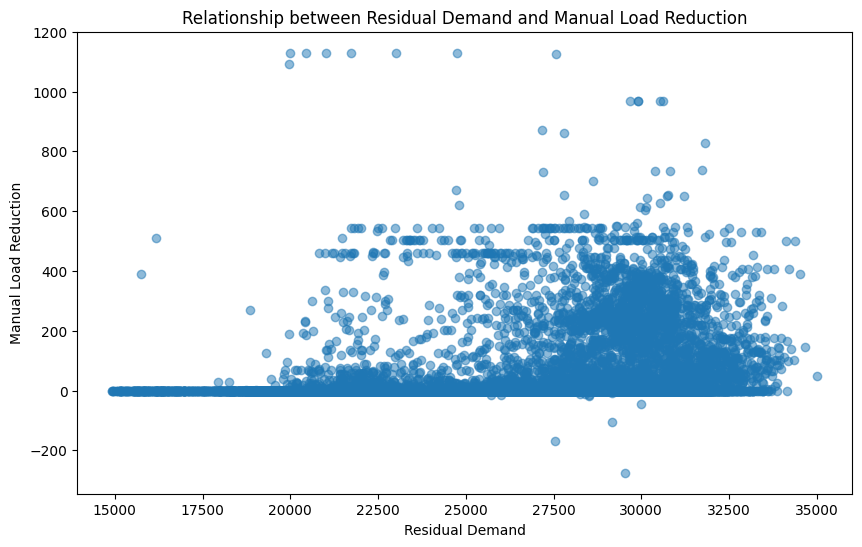

In [7]:
# Let's start by visualizing the relationship between energy usage variables
plt.figure(figsize=(10, 6))
plt.scatter(data['Residual Demand'], data['Manual Load_Reduction(MLR)'], alpha=0.5)
plt.xlabel('Residual Demand')
plt.ylabel('Manual Load Reduction')
plt.title('Relationship between Residual Demand and Manual Load Reduction')
plt.show()

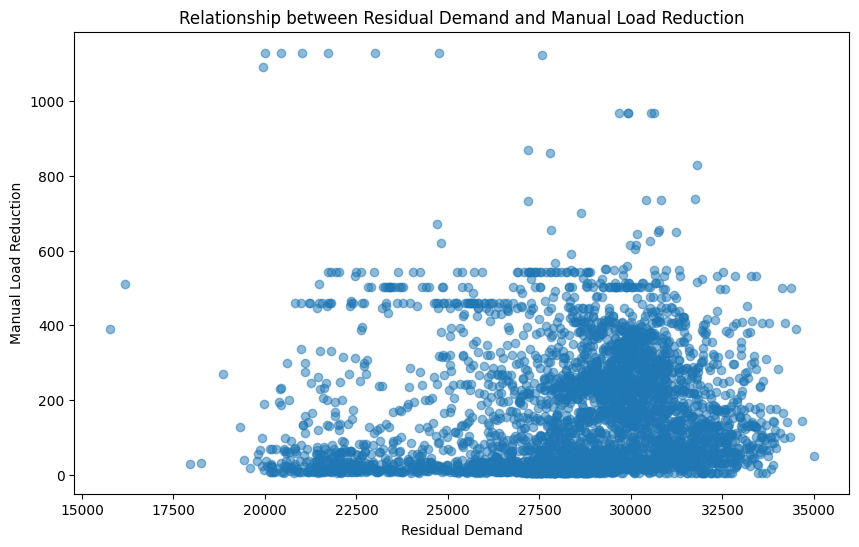

In [8]:
# Step 2: Data Preprocessing
relevant_columns = ['Residual Demand', 'Thermal Generation', 'Nuclear Generation',
                   'Manual Load_Reduction(MLR)', 'IOS Excl ILS and MLR',
                   'Wind', 'PV', 'CSP']
data = data[relevant_columns].dropna()

# Filter out instances where Manual Load Reduction is too close to zero or negative
data = data[(data['Manual Load_Reduction(MLR)'] > 5)] 

# Step 3: Exploratory Data Analysis (EDA)
# Visualize the relationship between energy usage variables
plt.figure(figsize=(10, 6))
plt.scatter(data['Residual Demand'], data['Manual Load_Reduction(MLR)'], alpha=0.5)
plt.xlabel('Residual Demand')
plt.ylabel('Manual Load Reduction')
plt.title('Relationship between Residual Demand and Manual Load Reduction')
plt.show()

In [11]:
# Transform the 'Manual Load Reduction' variable to address skewness
scaler = PowerTransformer()
data['Manual Load_Reduction(MLR)'] = scaler.fit_transform(data[['Manual Load_Reduction(MLR)']])


In [12]:
# Step 5: Model Selection
X = data.drop('Manual Load_Reduction(MLR)', axis=1)
y = data['Manual Load_Reduction(MLR)']

# Step 6: Training and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 7: Model Evaluation
# Predict on validation set
predictions = model.predict(X_valid)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.909120936277471


In [14]:
# Step 8: Interpretation and Insights
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
                Feature  Coefficient
0       Residual Demand     0.000032
1    Thermal Generation    -0.000264
2    Nuclear Generation    -0.000522
3  IOS Excl ILS and MLR     0.000058
4                  Wind    -0.000449
5                    PV     0.001352
6                   CSP    -0.010248


**Model Coefficients:**

- Residual Demand: The coefficient is positive but very small (0.000032), suggesting that a unit increase in residual demand is associated with a slight increase in manual load reduction.

- Thermal Generation and Nuclear Generation: Both have negative coefficients, indicating that higher thermal and nuclear generation are associated with lower manual load reduction, albeit with very small magnitudes (-0.000264 and -0.000522, respectively).

- IOS Excl ILS and MLR: This variable has a positive coefficient (0.000058), implying that higher values of "IOS Excl ILS and MLR" are associated with slightly higher manual load reduction.

- Wind: The coefficient is negative (-0.000449), suggesting that higher wind generation is associated with lower manual load reduction
PV (Photovoltaic): The coefficient is positive (0.001352), indicating that higher PV generation is associated with higher manual load reduction.

- CSP (Concentrated Solar Power): This variable has the most significant negative coefficient (-0.010248), suggesting that higher CSP generation is associated with substantially lower manual load reduction.